In [76]:
from IPython.display import display
import matplotlib.pyplot as plt

%matplotlib inline
import numpy as np
import os
import shutil
import wfdb
import collections
import seaborn as sns

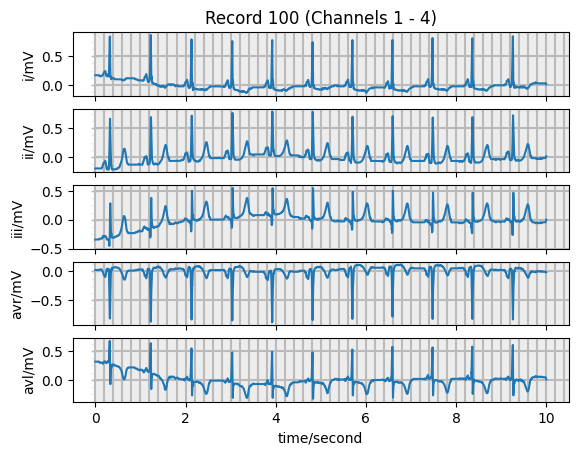

{'record_name': '100',
 'n_sig': 5,
 'fs': 500,
 'counter_freq': None,
 'base_counter': None,
 'sig_len': 5000,
 'base_time': None,
 'base_date': None,
 'comments': ['<age>: 76',
  '<sex>: F',
  '<diagnoses>:',
  'Rhythm: Sinus rhythm.',
  'Electric axis of the heart: normal.',
  'Left atrial hypertrophy.',
  'Left atrial overload.',
  'Left ventricular hypertrophy.',
  'Ischemia: anterior wall.',
  'Ischemia: lateral wall.'],
 'sig_name': ['i', 'ii', 'iii', 'avr', 'avl'],
 'p_signal': array([[ 0.17120281, -0.19676113, -0.34140625,  0.0249004 ,  0.31442786],
        [ 0.17120281, -0.19595142, -0.340625  ,  0.0249004 ,  0.31442786],
        [ 0.17120281, -0.19595142, -0.340625  ,  0.0249004 ,  0.31442786],
        ...,
        [ 0.02458297,  0.01052632, -0.0109375 , -0.0189243 ,  0.02089552],
        [ 0.0166813 ,  0.01295547, -0.0015625 , -0.01593625,  0.01094527],
        [ 0.01404741,  0.01376518,  0.0015625 , -0.01494024,  0.00696517]]),
 'd_signal': None,
 'e_p_signal': None,
 'e_d

In [18]:
record = wfdb.rdrecord("data/data/100", channels=[0, 1, 2, 3, 4])
wfdb.plot_wfdb(
    record=record,
    title="Record 100 (Channels 1 - 4)",
    time_units="seconds",
    ecg_grids="all",
)
display(record.__dict__)

In [5]:
data_recs = []
for i in range(1, 201):
    record = wfdb.rdrecord("data/data/" + str(i))
    data_recs.append(record)

data_recs[:3]

In [6]:
target = "Non-specific repolarization abnormalities"
labels = []

for data in data_recs:
    s = "".join(data.comments)
    if target in s:
        labels.append(1)
    else:
        labels.append(0)
labels[:10]

[1, 1, 0, 0, 1, 0, 0, 0, 1, 0]

Text(0.5, 1.0, 'Number of Conduction Abnormalities in LUDB Dataset')

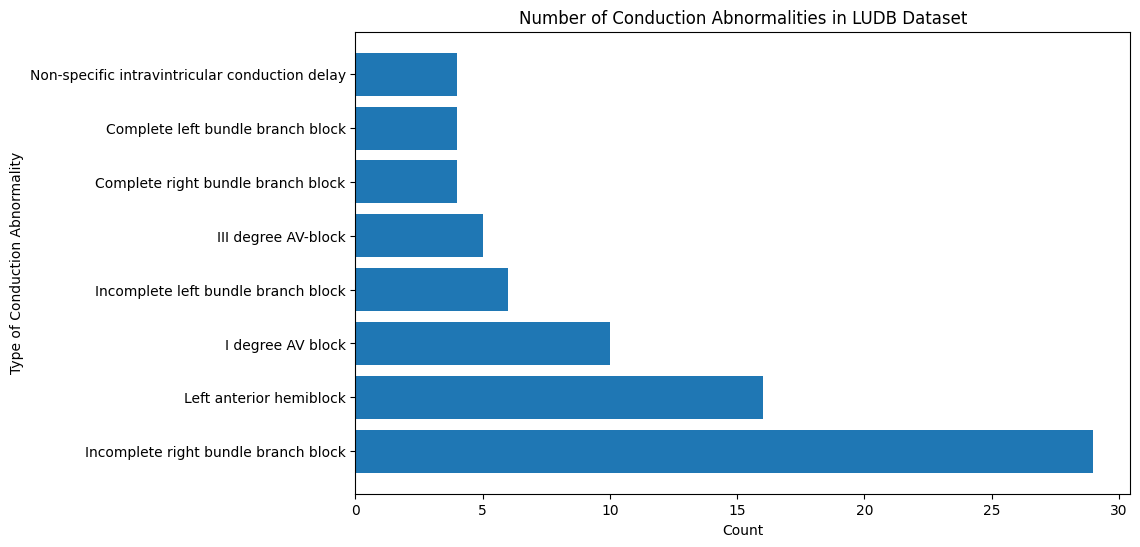

In [36]:
import collections

# Conduction Abnormalities
target_conditions = [
    "Sinoatrial blockade, undetermined",
    "I degree AV block",
    "III degree AV-block",
    "Incomplete right bundle branch block",
    "Incomplete left bundle branch block",
    "Left anterior hemiblock",
    "Complete right bundle branch block",
    "Complete left bundle branch block",
    "Non-specific intravintricular conduction delay",
]

condition_counts = collections.defaultdict(int)

for data in data_recs:
    s = "".join(data.comments)
    for condition in target_conditions:
        if condition in s:
            condition_counts[condition] += 1

sorted_counts = sorted(condition_counts.items(), key=lambda x: x[1], reverse=True)

plt.figure(figsize=(10, 6))
plt.barh([item[0] for item in sorted_counts], [item[1] for item in sorted_counts])
plt.xlabel("Count")
plt.ylabel("Type of Conduction Abnormality")
plt.title("Number of Conduction Abnormalities in LUDB Dataset")

Text(0.5, 1.0, 'Number of Hypertrophies in LUDB Dataset')

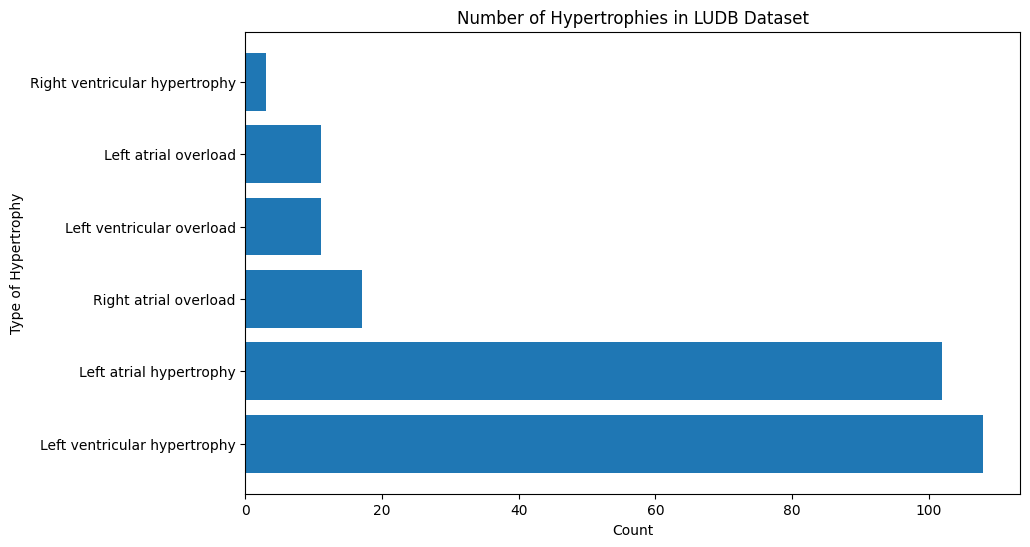

In [37]:
# Hypertrophies
target_conditions = [
    "Right atrial hypertropy",
    "Left atrial hypertrophy",
    "Right atrial overload",
    "Left atrial overload",
    "Left ventricular hypertrophy",
    "Right ventricular hypertrophy",
    "Left ventricular overload",
]

condition_counts = collections.defaultdict(int)

for data in data_recs:
    s = "".join(data.comments)
    for condition in target_conditions:
        if condition in s:
            condition_counts[condition] += 1

sorted_counts = sorted(condition_counts.items(), key=lambda x: x[1], reverse=True)

plt.figure(figsize=(10, 6))
plt.barh([item[0] for item in sorted_counts], [item[1] for item in sorted_counts])
plt.xlabel("Count")
plt.ylabel("Type of Hypertrophy")
plt.title("Number of Hypertrophies in LUDB Dataset")

Text(0.5, 1.0, 'Distribution of Signal Durations in LUDB Dataset')

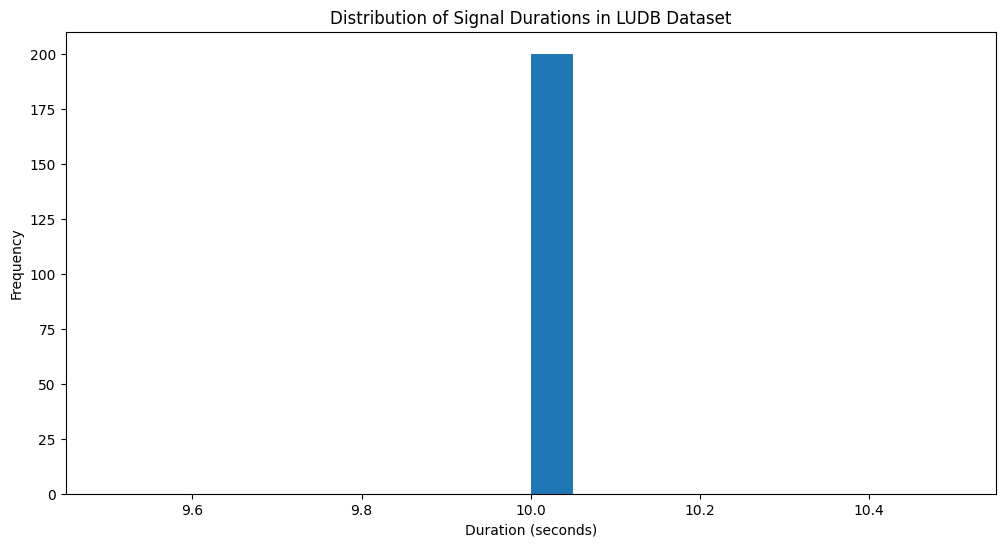

In [21]:
# Verifying the distribution of signal durations
durations = [data.sig_len / data.fs for data in data_recs]

plt.figure(figsize=(12, 6))
plt.hist(durations, bins=20)
plt.xlabel("Duration (seconds)")
plt.ylabel("Frequency")
plt.title("Distribution of Signal Durations in LUDB Dataset")

In [24]:
summary_stats = []

for data in data_recs:
    stats = {
        "mean": np.mean(data.p_signal, axis=0),
        "std": np.std(data.p_signal, axis=0),
        "min": np.min(data.p_signal, axis=0),
        "max": np.max(data.p_signal, axis=0),
    }
    summary_stats.append(stats)

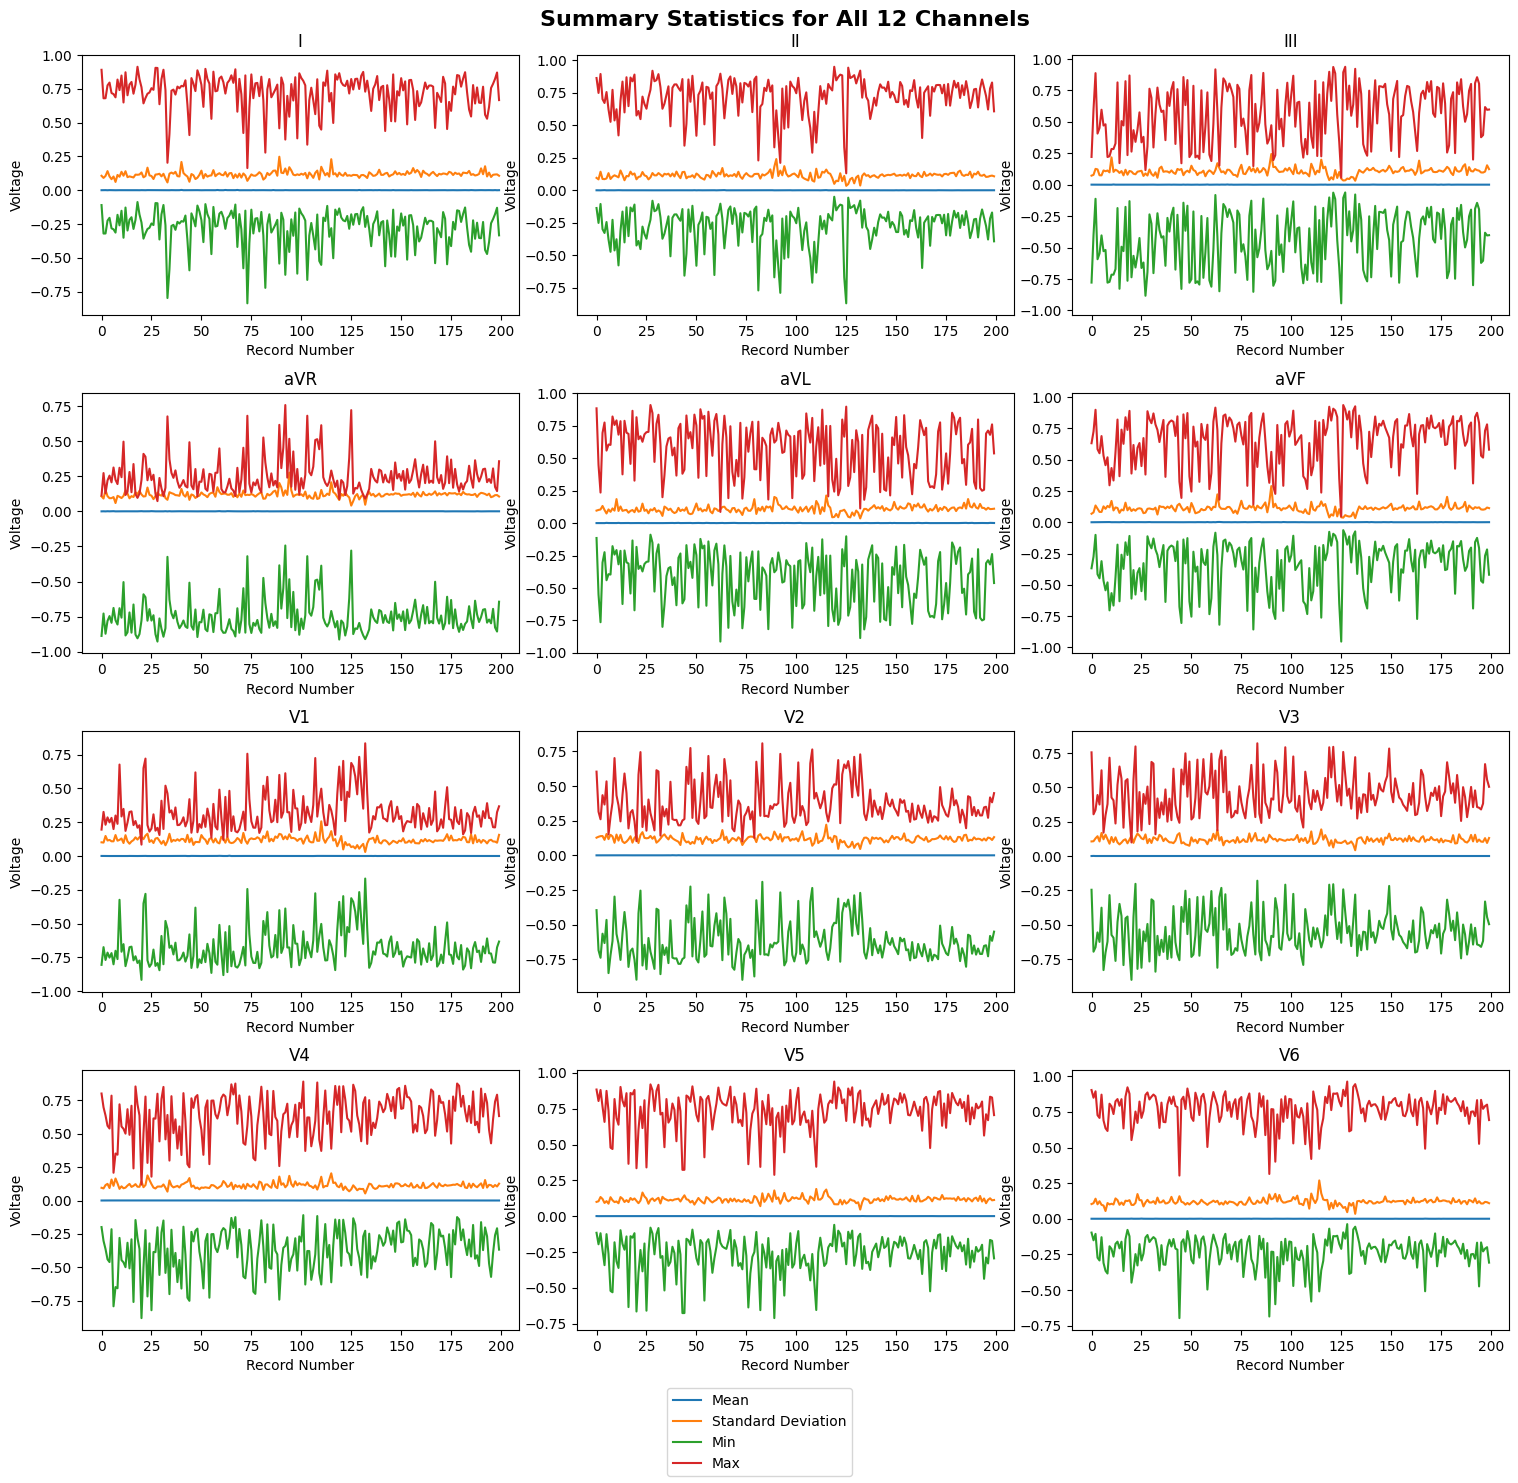

In [73]:
# Visualize summary stats for all 12 channels, 4 x 3
fig, axes = plt.subplots(4, 3, figsize=(15, 15))
plt.tight_layout()
plt.subplots_adjust(hspace=0.3)
for i, channel in enumerate(
    ["I", "II", "III", "aVR", "aVL", "aVF", "V1", "V2", "V3", "V4", "V5", "V6"]
):
    ax = axes[i // 3, i % 3]
    ax.plot([stats["mean"][i] for stats in summary_stats], label="Mean")
    ax.plot([stats["std"][i] for stats in summary_stats], label="Standard Deviation")
    ax.plot([stats["min"][i] for stats in summary_stats], label="Min")
    ax.plot([stats["max"][i] for stats in summary_stats], label="Max")
    ax.set_xlabel("Record Number")
    ax.set_ylabel("Voltage")
    ax.set_title(channel)

    if i == 11:
        handles, labels = ax.get_legend_handles_labels()
        fig.legend(handles, labels, loc="lower center")

plt.subplots_adjust(bottom=0.1)
plt.suptitle("Summary Statistics for All 12 Channels", fontsize=16, fontweight="bold")
plt.subplots_adjust(top=0.95)

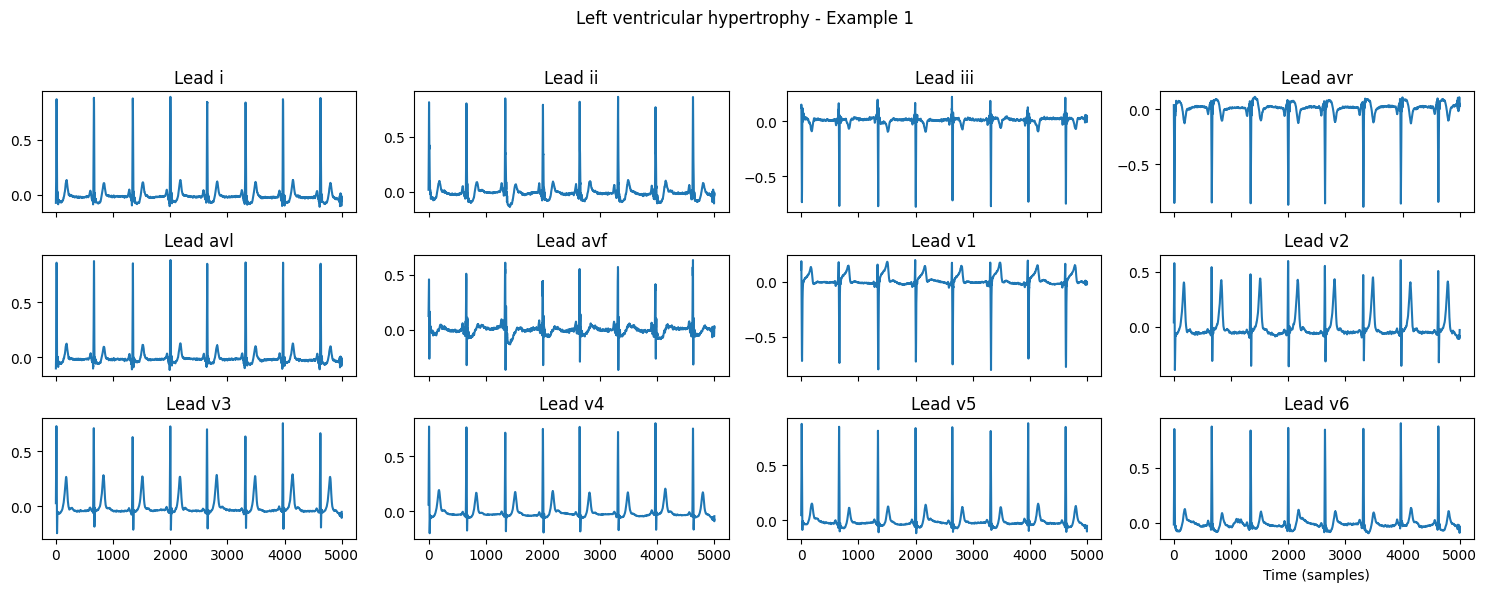

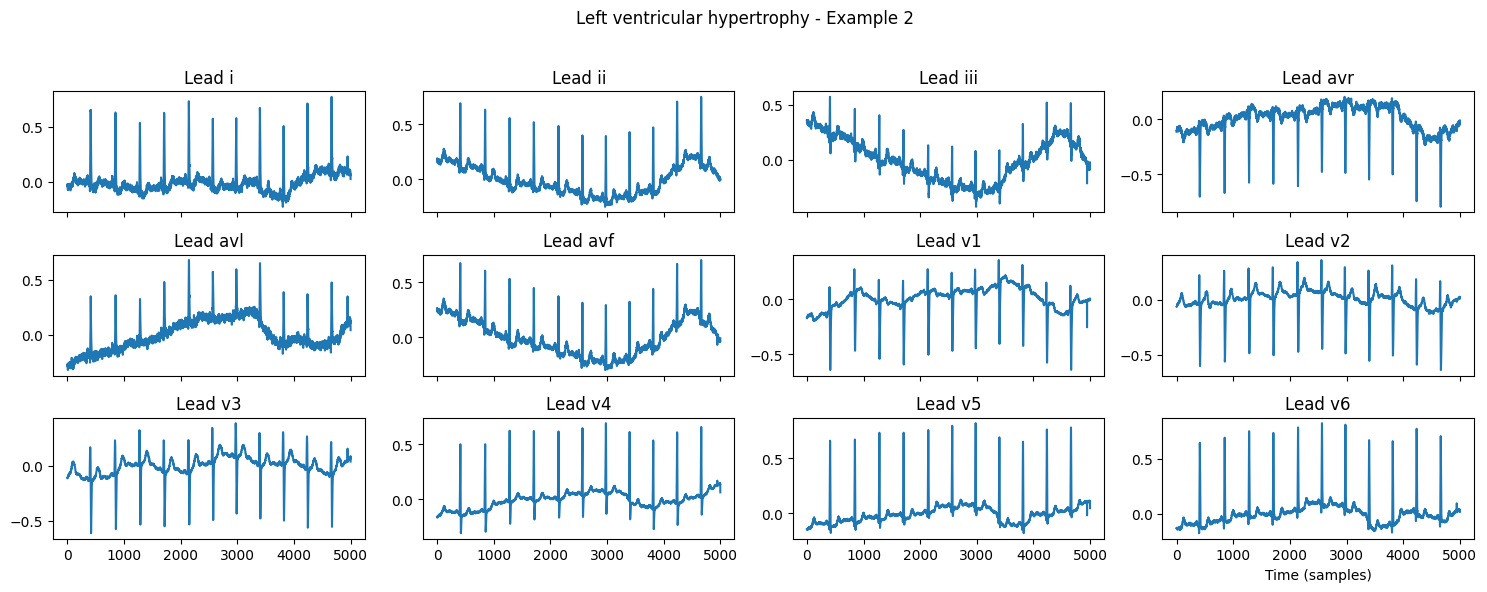

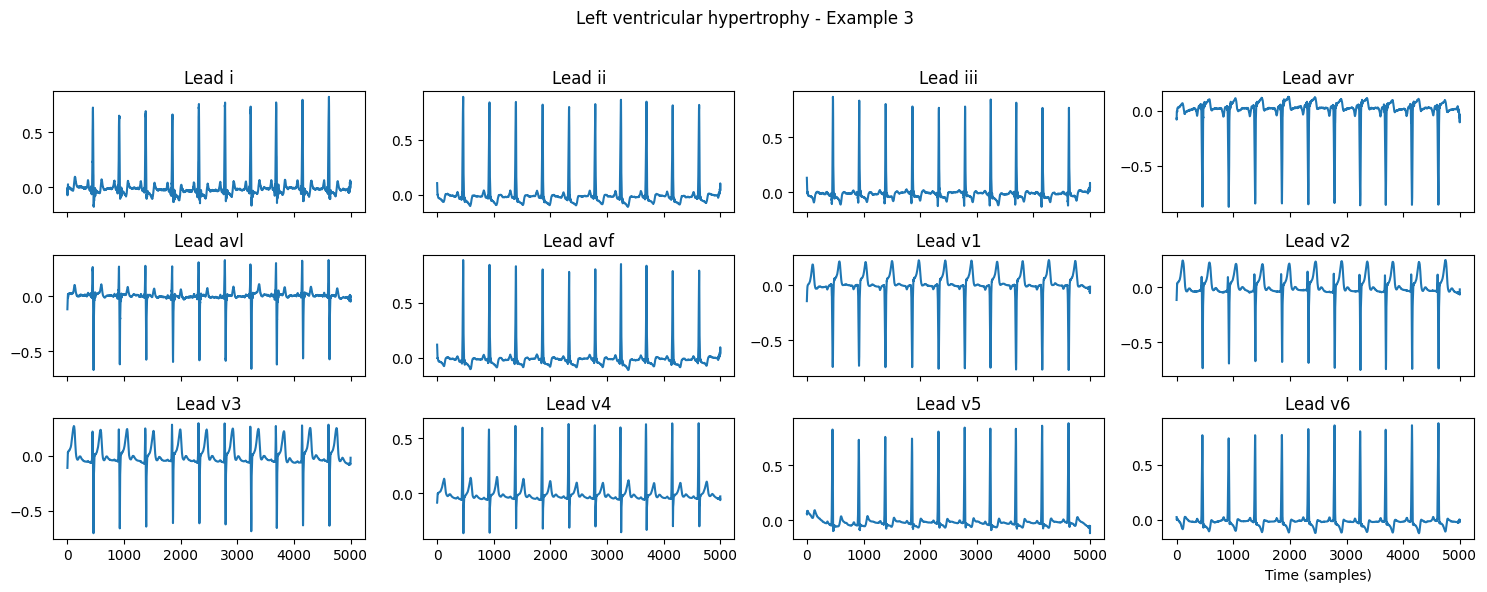

In [75]:
import random


# Visualize ECG signals for different conditions
def plot_random_ecg(records, condition, n_samples=3):
    condition_records = [
        record for record in records if condition in "".join(record.comments)
    ]
    selected_records = random.sample(condition_records, n_samples)

    for i, record in enumerate(selected_records):
        fig, axes = plt.subplots(3, 4, figsize=(15, 6), sharex=True)
        for j in range(12):
            axes[j // 4, j % 4].plot(record.p_signal[:, j])
            axes[j // 4, j % 4].set_title(f"Lead {record.sig_name[j]}")
        fig.suptitle(f"{condition} - Example {i+1}")
        plt.xlabel("Time (samples)")
        plt.tight_layout(rect=[0, 0, 1, 0.96])
        plt.show()


# Example usage
plot_random_ecg(data_recs, "Left ventricular hypertrophy")

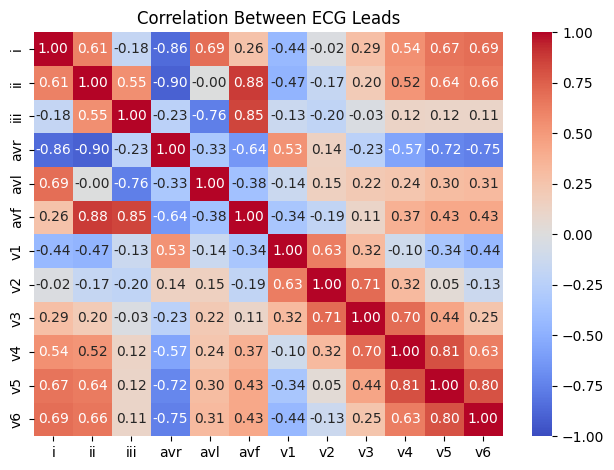

In [82]:
def get_lead_correlations(records):
    lead_signals = []

    for record in records:
        lead_signals.append(record.p_signal)

    lead_signals = np.vstack(lead_signals)
    return np.corrcoef(lead_signals.T)


lead_correlations = get_lead_correlations(data_recs)
sns.heatmap(
    lead_correlations,
    annot=True,
    xticklabels=record.sig_name,
    yticklabels=record.sig_name,
    cmap="coolwarm",
    center=0,
    vmin=-1,
    vmax=1,
    fmt=".2f",
)
plt.title("Correlation Between ECG Leads")
plt.tight_layout()